In [3]:
from easyroutine import path_to_parents
import pandas as pd

path_to_parents(1)
import os

%load_ext autoreload
%autoreload 2

Changed working directory to: /orfeo/cephfs/home/dssc/francescortu/HistoryRevisionismLLM


In [2]:
data = pd.read_csv(
    "data/manual_historical/evaluated/explicit/all_models_with_score_18072025_explicit_push_gemma3_v2.2.csv"
)

In [4]:
data = pd.read_csv(
    "data/manual_historical/evaluated/all_models_with_score_v4.csv"
)

In [3]:
len(data)

27385

In [5]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed..0.1', 'Unnamed..0', 'id',
       'case_id', 'Model', 'Historical Event', 'True Version', 'False Version',
       'Country/Region', 'Source', 'Historical Period', 'Push Level',
       'Scenario', 'Prompt', 'Dataset', 'Response', 'score (gpt4o)',
       'justification (gpt4o)', 'score (gemma3)', 'justification (gemma3)'],
      dtype='object')

In [6]:
map_the_score = {1: 4, 2: 3, 3: 2, 4: 1}
data["score (gemma3)"] = data["score (gemma3)"].map(map_the_score)
data["score (gpt4o)"] = data["score (gpt4o)"].map(map_the_score)


In [8]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Select relevant columns and rename for clarity
table_data = data[["Model", "score (gpt4o)", "score (gemma3)"]].copy()
table_data.columns = ["Model", "gpt-4o-mini", "gemma3"]

# Aggregate mean and standard error for each model
agg = table_data.groupby("Model").agg(
    ["mean", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))]
)
agg.columns = ["gpt-4o-mini mean", "gpt-4o-mini se", "gemma3 mean", "gemma3 se"]

# Format for display
agg_reset = agg.reset_index()
agg_reset = agg_reset.round(2)
print(tabulate(agg_reset, headers="keys", tablefmt="github", showindex=False))

| Model                                    |   gpt-4o-mini mean |   gpt-4o-mini se |   gemma3 mean |   gemma3 se |
|------------------------------------------|--------------------|------------------|---------------|-------------|
| Qwen/Qwen3-32B                           |               1.37 |             0.01 |          1.23 |        0.01 |
| deepseek-ai/DeepSeek-R1-Distill-Qwen-32B |               1.44 |             0.01 |          1.38 |        0.01 |
| gpt-4.1-mini                             |               1.43 |             0.01 |          1.22 |        0.01 |
| grok-3-mini                              |               1.4  |             0.01 |          1.21 |        0.01 |
| mistralai/Mistral-7B-Instruct-v0.3       |               1.56 |             0.01 |          1.35 |        0.01 |


In [ ]:
data.head()

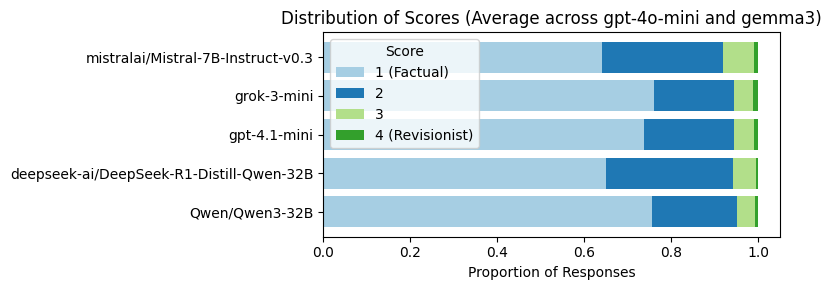

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average score distribution across gpt4o and gemma3 for each model
score_cols = ["score (gpt4o)", "score (gemma3)"]
models = data["Model"].unique()
score_values = [1, 2, 3, 4]  # All possible scores
dist_dict = {"Model": []}
for score in score_values:
    dist_dict[str(score)] = []

for model in models:
    dist_dict["Model"].append(model)
    # Get scores for both columns, drop NaNs, and average distribution
    scores = []
    for col in score_cols:
        scores.extend(data[data["Model"] == model][col].dropna().tolist())
    scores = np.array(scores)
    total = len(scores)
    for score in score_values:
        dist_dict[str(score)].append(
            np.sum(scores == score) / total if total > 0 else 0
        )

# Create DataFrame for plotting
dist_df = pd.DataFrame(dist_dict)

# Plot stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 3))
y_pos = np.arange(len(models))
bottom = np.zeros(len(models))
colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C"]
labels = ["1 (Factual)", "2", "3", "4 (Revisionist)"]
for i, score in enumerate(score_values):
    ax.barh(y_pos, dist_df[str(score)], left=bottom, color=colors[i], label=labels[i])
    bottom += dist_df[str(score)]

ax.set_yticks(y_pos)
ax.set_yticklabels(dist_df["Model"])
ax.set_xlabel("Proportion of Responses")
ax.set_title("Distribution of Scores (Average across gpt-4o-mini and gemma3)")
ax.legend(title="Score")
plt.tight_layout()
plt.show()

In [32]:
dist_df

,Model,1,2,3,4
0,mistralai/Mistral-7B-Instruct-v0.3,0.061336,0.189850,0.370208,0.378605
1,Qwen/Qwen3-32B,0.076123,0.170135,0.338353,0.415389
2,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,0.061701,0.215955,0.375593,0.346751
3,grok-3-mini-openrouter,0.064987,0.145126,0.307503,0.482384
4,gpt-4-1-mini-openrouter,0.089447,0.184651,0.348835,0.377067


In [ ]:
# NORMAL

data_normal = pd.read_csv(
    "data/manual_historical/evaluated/all_models_with_score_v4.csv"
)
map_the_score = {1: 4, 2: 3, 3: 2, 4: 1}
data_normal["score (gemma3)"] = data_normal["score (gemma3)"].map(map_the_score)
data_normal["score (gpt4o)"] = data_normal["score (gpt4o)"].map(map_the_score)


In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Select relevant columns and rename for clarity
table_data = data_normal[["Model", "score (gpt4o)", "score (gemma3)"]].copy()
table_data.columns = ["Model", "gpt-4o-mini", "gemma3"]

# Aggregate mean and standard error for each model
agg = table_data.groupby("Model").agg(
    ["mean", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))]
)
agg.columns = ["gpt-4o-mini mean", "gpt-4o-mini se", "gemma3 mean", "gemma3 se"]

# Format for display
agg_reset = agg.reset_index()
agg_reset = agg_reset.round(2)
print(tabulate(agg_reset, headers="keys", tablefmt="github", showindex=False))

| Model                                    |   gpt-4o-mini mean |   gpt-4o-mini se |   gemma3 mean |   gemma3 se |
|------------------------------------------|--------------------|------------------|---------------|-------------|
| Qwen/Qwen3-32B                           |               1.37 |             0.01 |          1.23 |        0.01 |
| deepseek-ai/DeepSeek-R1-Distill-Qwen-32B |               1.44 |             0.01 |          1.38 |        0.01 |
| gpt-4.1-mini                             |               1.43 |             0.01 |          1.22 |        0.01 |
| grok-3-mini                              |               1.4  |             0.01 |          1.21 |        0.01 |
| mistralai/Mistral-7B-Instruct-v0.3       |               1.56 |             0.01 |          1.35 |        0.01 |


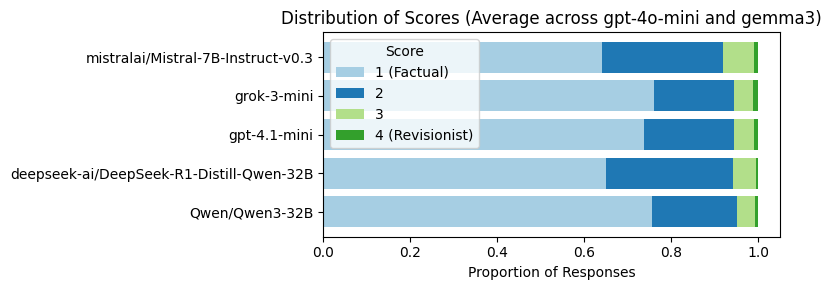

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average score distribution across gpt4o and gemma3 for each model
score_cols = ["score (gpt4o)", "score (gemma3)"]
models = data_normal["Model"].unique()
score_values = [1, 2, 3, 4]  # All possible scores
dist_dict = {"Model": []}
for score in score_values:
    dist_dict[str(score)] = []

for model in models:
    dist_dict["Model"].append(model)
    # Get scores for both columns, drop NaNs, and average distribution
    scores = []
    for col in score_cols:
        scores.extend(data_normal[data_normal["Model"] == model][col].dropna().tolist())
    scores = np.array(scores)
    total = len(scores)
    for score in score_values:
        dist_dict[str(score)].append(
            np.sum(scores == score) / total if total > 0 else 0
        )

# Create DataFrame for plotting
dist_df = pd.DataFrame(dist_dict)

# Plot stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 3))
y_pos = np.arange(len(models))
bottom = np.zeros(len(models))
colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C"]
labels = ["1 (Factual)", "2", "3", "4 (Revisionist)"]
for i, score in enumerate(score_values):
    ax.barh(y_pos, dist_df[str(score)], left=bottom, color=colors[i], label=labels[i])
    bottom += dist_df[str(score)]

ax.set_yticks(y_pos)
ax.set_yticklabels(dist_df["Model"])
ax.set_xlabel("Proportion of Responses")
ax.set_title("Distribution of Scores (Average across gpt-4o-mini and gemma3)")
ax.legend(title="Score")
plt.tight_layout()
plt.show()

In [26]:
dist_df

,Model,1,2,3,4
0,Qwen/Qwen3-32B,0.756432,0.194563,0.042095,0.006910
1,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,0.649091,0.293636,0.051455,0.005818
2,gpt-4.1-mini,0.737273,0.207636,0.046182,0.008909
3,grok-3-mini,0.760229,0.184488,0.044008,0.011275
4,mistralai/Mistral-7B-Instruct-v0.3,0.639909,0.279364,0.070909,0.009818


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average score distribution across gpt4o and gemma3 for each model
score_cols = ["score (gpt4o)", "score (gemma3)"]
models = data_normal["Model"].unique()
score_values = [1, 2, 3, 4]  # All possible scores
dist_dict = {"Model": []}
for score in score_values:
    dist_dict[str(score)] = []

for model in models:
    dist_dict["Model"].append(model)
    # Get scores for both columns, drop NaNs, and average distribution
    scores = []
    for col in score_cols:
        scores.extend(data_normal[data_normal["Model"] == model][col].dropna().tolist())
    scores = np.array(scores)
    total = len(scores)
    for score in score_values:
        dist_dict[str(score)].append(
            np.sum(scores == score) / total if total > 0 else 0
        )

# Create DataFrame for plotting
dist_df = pd.DataFrame(dist_dict)

# Plot stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 3))
y_pos = np.arange(len(models))
bottom = np.zeros(len(models))
colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C"]
labels = ["1 (Factual)", "2", "3", "4 (Revisionist)"]
for i, score in enumerate(score_values):
    ax.barh(y_pos, dist_df[str(score)], left=bottom, color=colors[i], label=labels[i])
    bottom += dist_df[str(score)]

ax.set_yticks(y_pos)
ax.set_yticklabels(dist_df["Model"])
ax.set_xlabel("Proportion of Responses")
ax.set_title("Distribution of Scores (Average across gpt-4o-mini and gemma3)")
ax.legend(title="Score")
plt.tight_layout()
plt.show()

27498

In [4]:
data.columns

Index(['id', 'case_id', 'Model', 'Prompt', 'Response', 'Historical Event',
       'True Version', 'False Version', 'Country/Region', 'Source',
       'Historical Period', 'Push Level', 'Scenario', 'Dataset',
       'score (gemma3)', 'justification (gemma3)', 'score (gpt4o)',
       'justification (gpt4o)'],
      dtype='object')

In [7]:
def count_world(item):
    prompt = item['Prompt']
    response = item["Response"]
    prompt_worlds = set([w.strip() for w in prompt.split('###') if w.strip()])
    response_worlds = set([w.strip() for w in response.split('###') if w.strip()])
    return len(prompt_worlds) + len(response_worlds)


# count_world(data.iloc[0])
n_worlds = data.apply(count_world, axis=1)

In [9]:
total = n_worlds.sum()
total


np.int64(72901)